In [1]:
#!/usr/bin/env python3
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
from train import *
from model import *
%matplotlib inline

## ---------------------- load data ----------------------------------------
with open("../data/200k.pkl", "rb") as f:
    x, y = pkl.load(f)

Welcome to JupyROOT 6.26/02


## Find optimal learning rate range

In [2]:
model = build_model_no_config(x[0].shape, y.shape[-1])
print(x.shape[0])

lr = 0.001
opt= SGD(lr)
model.compile(optimizer=opt, loss="mse", metrics=["accuracy"])

lr_finder = LRFinder(model)
lr_finder.find(x, y, start_lr=1e-6, end_lr=3, batch_size=256, epochs=3)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 72, 32, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 72, 32, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 72, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 16, 64)       0     

2022-06-01 14:59:09.890984: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-01 14:59:09.921517: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-01 14:59:09.921654: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-01 14:59:09.922415: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

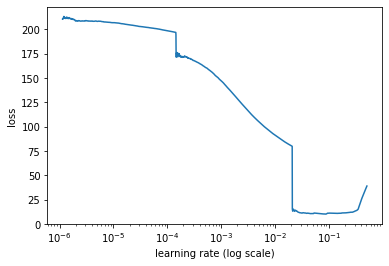

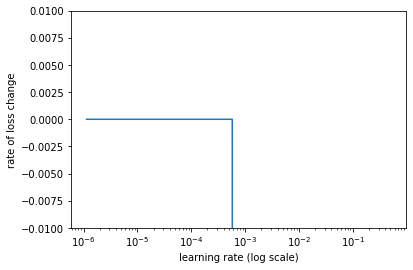

In [3]:
lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)
plt.show()
lr_finder.plot_loss_change(sma=1000, n_skip_beginning=20, n_skip_end=5)
plt.show()

## Use 1cycle LR policy

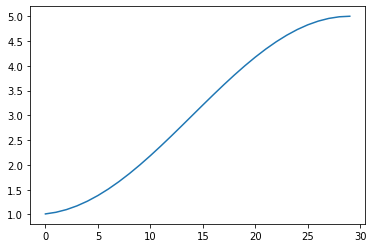

In [2]:
from one_cycle import *
x = np.arange(30)
cos = CosineAnnealer(1, 5, 30)
y = [cos.step() for i in range(30)]
plt.plot(x, y)
plt.show()

In [6]:
epochs = 20
spe = 5000
one_cycle = OneCycleSchedule(1e-6, 0.001, 4*spe)

one_cycle